### Data Preprocessing

In [149]:
import numpy as np

In [150]:
# Binarization
from sklearn.preprocessing import Binarizer
data = np.array([[1,2,3,4],[-3,-2,-1,0]])
Binarizer(threshold=2).transform(data)

array([[0, 0, 1, 1],
       [0, 0, 0, 0]])

In [151]:
# Mean removal
from sklearn.preprocessing import scale
data = np.random.normal(3,size=100)
print(data.mean())
data_scaled = scale(data)
print(data_scaled.mean())

3.1916492203966946
2.8976820942716584e-16


In [152]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

data = np.random.normal(3, size=100).reshape(-1, 1)
print(data.mean())

minmax_scaler = MinMaxScaler(feature_range=(5,6))
data_scaled = minmax_scaler.fit_transform(data)
print(data_scaled.mean())

data_orig = minmax_scaler.inverse_transform(data_scaled)
print(data_orig.mean())

2.8812252893743016
5.495553579943572
2.8812252893743016


In [153]:
# L1 Normalization
from sklearn.preprocessing import normalize
X = [[1,3],[2,4]]
print(normalize(X, norm="l1"))
print(normalize(X, norm="l1", axis=0))

[[0.25       0.75      ]
 [0.33333333 0.66666667]]
[[0.33333333 0.42857143]
 [0.66666667 0.57142857]]


In [154]:
# L2 Normalization
from sklearn.preprocessing import normalize
X = [[1, 3], [2, 4]]
print(normalize(X, norm="l2"))

[[0.31622777 0.9486833 ]
 [0.4472136  0.89442719]]


In [155]:
# Label Encoder (Used for encoding target values)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 6, 2, 2])
print(le.classes_)
print(le.transform([1, 1, 2, 6]))
print(le.inverse_transform([0, 0, 1, 2]))


[1 2 6]
[0 0 1 2]
[1 1 2 6]


In [156]:
le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "delhi"])
print(le.classes_)
print(le.transform(["tokyo", "tokyo", "paris"]))
print(le.inverse_transform([2, 2, 1]))

['delhi' 'paris' 'tokyo']
[2 2 1]
['tokyo' 'tokyo' 'paris']


In [157]:
# One Hot Encoder (Used for encoding input values)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
X_transformed = enc.fit_transform(X).toarray()
print(enc.categories_)
print(enc.get_feature_names(["gender","group"]))
print(X_transformed)
print(enc.inverse_transform(X_transformed))

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
['gender_Female' 'gender_Male' 'group_1' 'group_2' 'group_3']
[[0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]]
[['Male' 1]
 ['Female' 3]
 ['Female' 2]]


### Dataset Loading

In [158]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [159]:
X = iris_data.data
y = iris_data.target
X[:5],y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [160]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [161]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [162]:
X.shape, y.shape

((150, 4), (150,))

### Splitting the dataset

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

### Stochastic Gradient Descent

In [194]:
# Train
from sklearn.linear_model import SGDClassifier
mymodel = SGDClassifier(max_iter = 100, tol=1e-3, penalty="elasticnet", loss="")
mymodel.fit(X_train, y_train)

SGDClassifier(max_iter=100, penalty='elasticnet')

In [195]:
# Test
from sklearn import metrics
y_pred = mymodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [199]:
# Predict
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = mymodel.predict(sample)
predNames = [iris_data.target_names[p] for p in preds]
predNames

['setosa', 'virginica']

### KNN

In [164]:
# Train
from sklearn.neighbors import KNeighborsClassifier
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [165]:
# Test
from sklearn import metrics
y_pred = mymodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [176]:
# Predict
sample = [[5,5,3,2], [2,4,3,5]]
preds = mymodel.predict(sample)
predNames = [iris_data.target_names[p] for p in preds]
predNames

['versicolor', 'versicolor']

### SVM

In [167]:
# Train
from sklearn.svm import SVC
mymodel = SVC(kernel="linear", gamma="scale", shrinking=False)
mymodel.fit(X_train, y_train)

SVC(kernel='linear', shrinking=False)

In [168]:
# Test
y_pred = mymodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [169]:
# Get value of attributes
print(mymodel.coef_)
print(mymodel.n_support_)
print(mymodel.support_vectors_[:3])
print(mymodel.support_)
print(mymodel.intercept_)
print(mymodel.fit_status_)

[[-3.64794487e-02  4.51944911e-01 -8.76446385e-01 -3.96729779e-01]
 [-7.04245024e-03  1.78871428e-01 -5.38455631e-01 -2.92196514e-01]
 [ 7.70155020e-01 -1.79883218e-03 -1.98125619e+00 -1.93084583e+00]]
[ 3 10  9]
[[5.1 3.3 1.7 0.5]
 [4.5 2.3 1.3 0.3]
 [4.8 3.4 1.9 0.2]]
[ 44  57  63  12  25  40  59  69  84  87  89  91 102  11  17  22  23  27
  42  74  98 100]
[1.38305037 1.50712472 8.04103505]
0


In [177]:
# Predict
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = mymodel.predict(sample)
predNames = [iris_data.target_names[p] for p in preds]
predNames

['versicolor', 'versicolor']

### DT

In [187]:
# Train
from sklearn import tree
mymodel = tree.DecisionTreeClassifier()
mymodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [172]:
# Test
y_pred = mymodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9555555555555556

In [188]:
# Predict
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = mymodel.predict(sample)
predNames = [iris_data.target_names[p] for p in preds]
predNames

['versicolor', 'versicolor']

In [181]:
pred_probs = mymodel.predict_proba(sample)
pred_Names_with_probs = [[(iris_data.target_names[idx], prob) for (
    idx, prob) in enumerate(parr)] for (parr) in pred_probs]
pred_Names_with_probs

[[('setosa', 0.0), ('versicolor', 1.0), ('virginica', 0.0)],
 [('setosa', 0.0), ('versicolor', 1.0), ('virginica', 0.0)]]

### Naive Bayes

In [189]:
# Train
from sklearn.naive_bayes import GaussianNB
mymodel = GaussianNB()
mymodel.fit(X_train, y_train)

GaussianNB()

In [190]:
# Test
y_pred = mymodel.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

In [191]:
# Predict
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = mymodel.predict(sample)
predNames = [iris_data.target_names[p] for p in preds]
predNames

['versicolor', 'virginica']

In [193]:
pred_probs = mymodel.predict_proba(sample)
pred_Names_with_probs = [[(iris_data.target_names[idx], prob) for (
    idx, prob) in enumerate(parr)] for (parr) in pred_probs]
pred_Names_with_probs

[[('setosa', 1.6348389086819225e-66),
  ('versicolor', 0.9614686844934832),
  ('virginica', 0.038531315506520336)],
 [('setosa', 0.0), ('versicolor', 2.0011844651474803e-43), ('virginica', 1.0)]]

### K-means clustering

In [200]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

In [202]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [204]:
mymodel = KMeans(n_clusters=10, random_state=0)
mymodel.fit_predict(digits.data)
mymodel.cluster_centers_.shape

(10, 64)

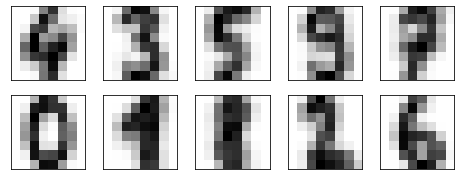

In [207]:
fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = mymodel.cluster_centers_.reshape(10,8,8)
for axis, center in zip(ax.flat, centers):
  axis.set(xticks=[], yticks=[])
  axis.imshow(center, interpolation='nearest', cmap=plt.cm.binary)